In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('Clean_Data.csv')
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59445 entries, 0 to 59444
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       59445 non-null  int64  
 1   timestamp        59445 non-null  object 
 2   TP2              59445 non-null  float64
 3   TP3              59445 non-null  float64
 4   H1               59445 non-null  float64
 5   DV_pressure      59445 non-null  float64
 6   Reservoirs       59445 non-null  float64
 7   Oil_temperature  59445 non-null  float64
 8   Motor_current    59445 non-null  float64
 9   COMP             59445 non-null  float64
 10  DV_eletric       59445 non-null  float64
 11  Towers           59445 non-null  float64
 12  MPG              59445 non-null  float64
 13  LPS              59445 non-null  float64
 14  Pressure_switch  59445 non-null  float64
 15  Oil_level        59445 non-null  float64
 16  Caudal_impulses  59445 non-null  float64
 17  status      

In [4]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_pred = lr.predict(X_test)

Accuracy Score: 98.351


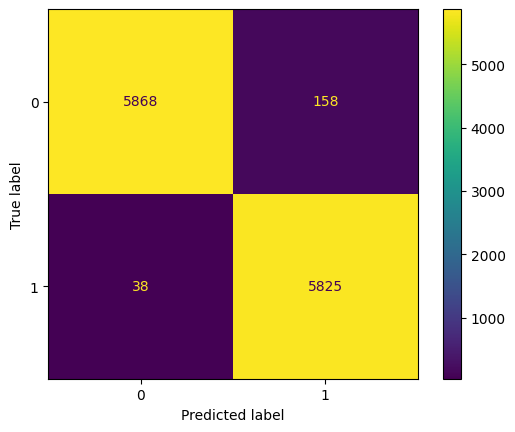

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6026
           1       0.97      0.99      0.98      5863

    accuracy                           0.98     11889
   macro avg       0.98      0.98      0.98     11889
weighted avg       0.98      0.98      0.98     11889



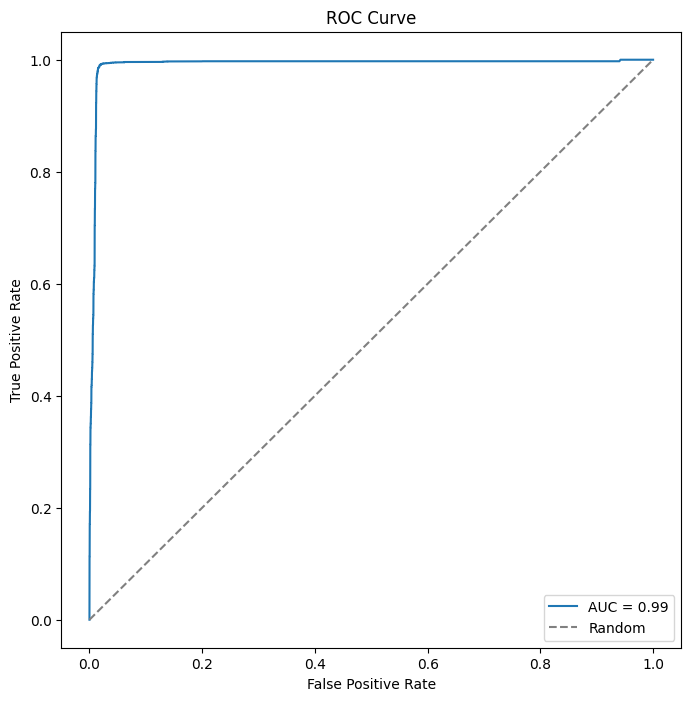

AUC Score: 0.9913


In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {:,.3f}".format(accuracy_score(y_test, y_pred) * 100))
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'AUC Score: {auc_score:.4f}')